# Classification : a supervised learning problem

From a set of (multivariate) observations for which the label (class) is known, how could we optimally estimate the class/label of unlabelled observations.

This is a supervised learning problem since we have data for which everything is known (both full observation set and labels) which are used to supervise the learning : they provide the mean to optimise the parameters of the class estimation algorithm.

## Classification as a density estimation problem

Assuming we have a bivariate problem (observing two dependent variables) with three classes. Our training dataset is then made of *points* in 2D for each of the three classes :

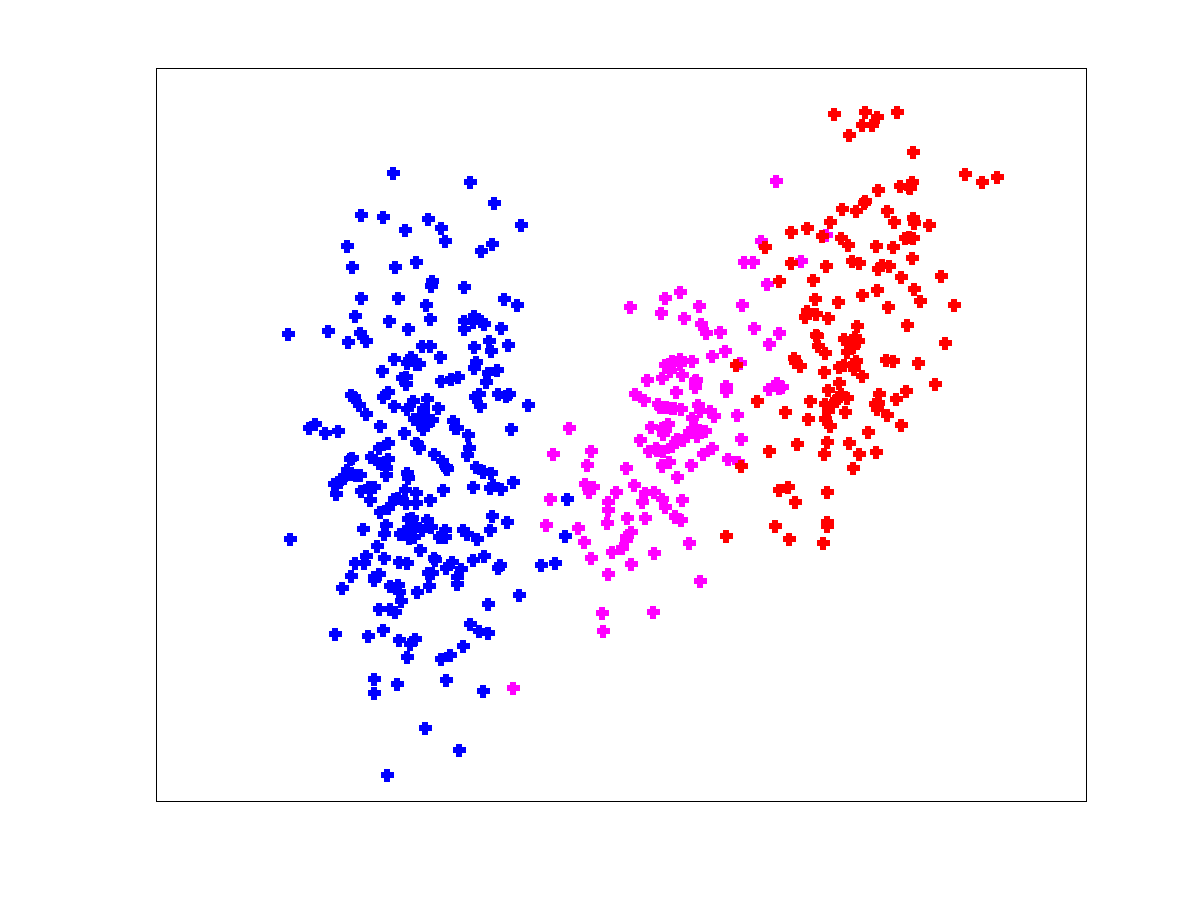

Here each of the displayed points correspond to a _bivariate data point_ from the **training set** and the colour corresponds to the class. 

This can be cast into a density estimation problem, where we have an extra information : the class/label information

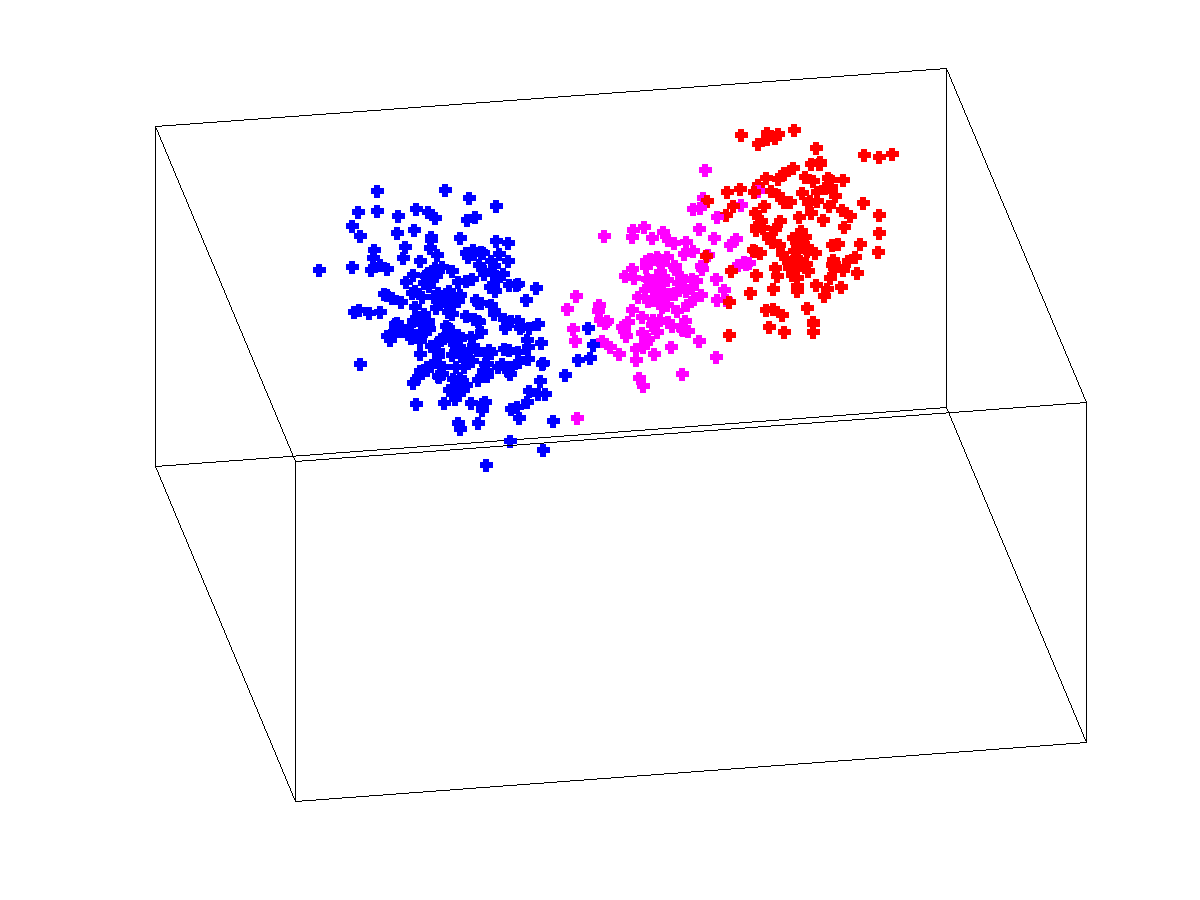

Representing the probability density of bivariate distribution of the observations

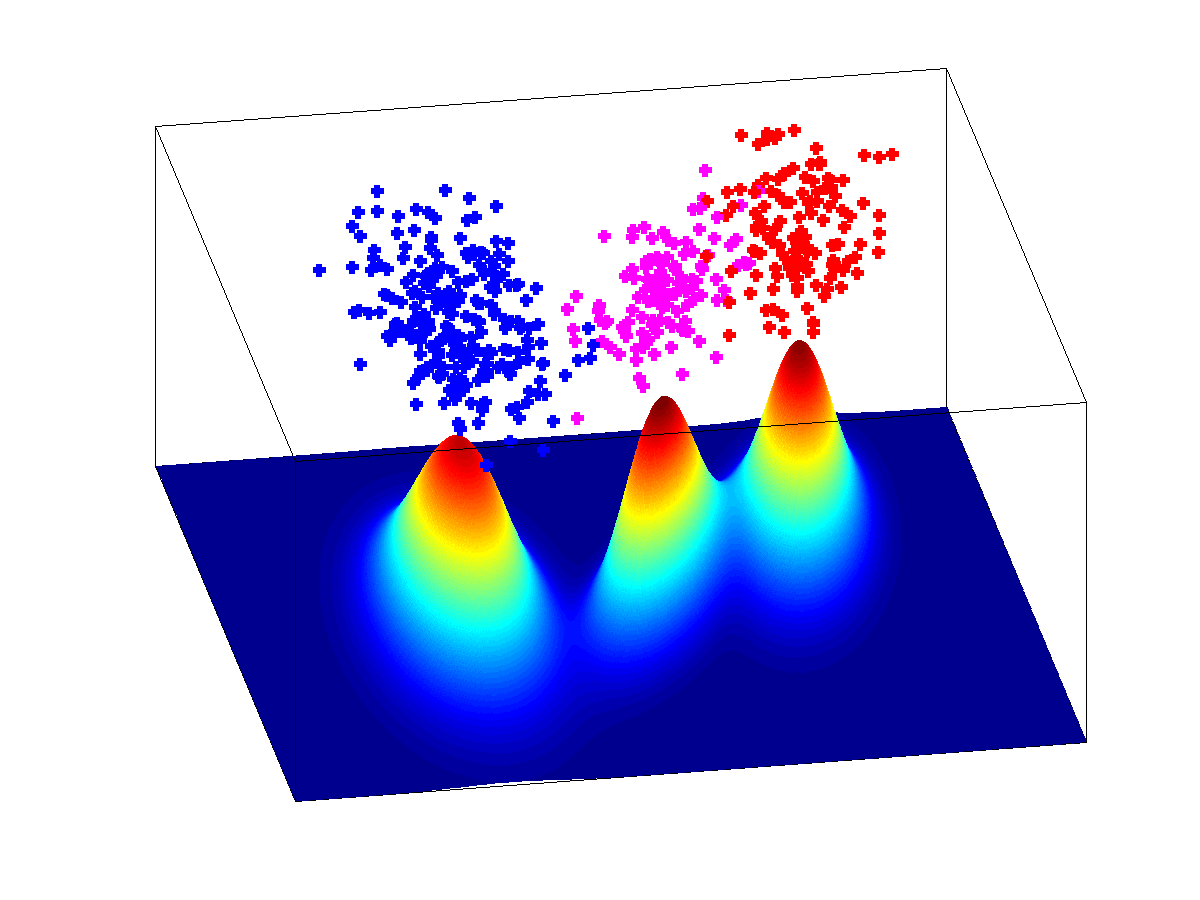

This is the weighted sum of the distribution of each class taken separately :

$$ P(\mathbf{X}) = \sum_{k=1}^3 \pi_k P_k(\mathbf{X}) $$

Where the $\pi_k$ stands for the proportion of class/label $k$ in the complete dataset, and $P_k(\mathbf{X})$ is the density probability specific to class $k$

Hence, for $k=\text{red}$ we have the $P_k$ :

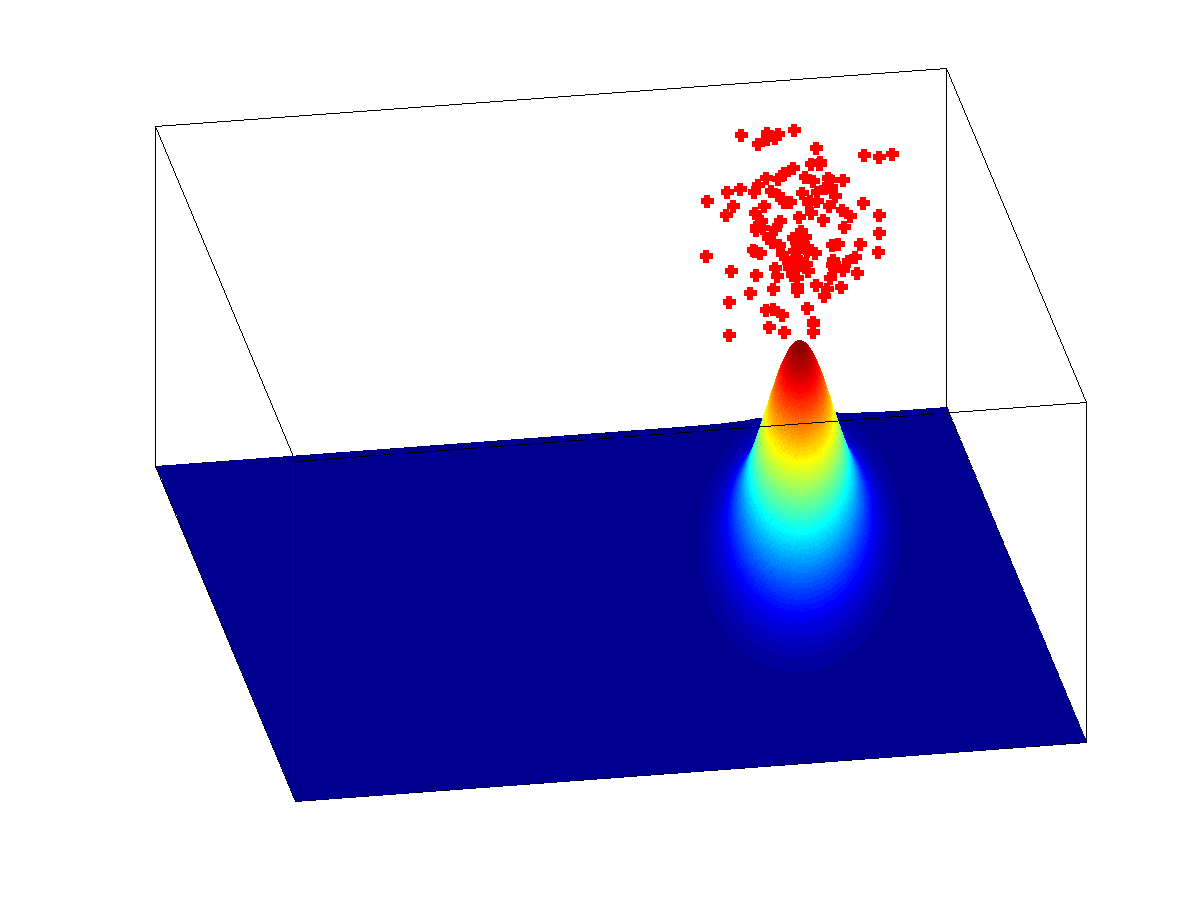

, for $k=\text{pink}$ we have the $P_k$ :

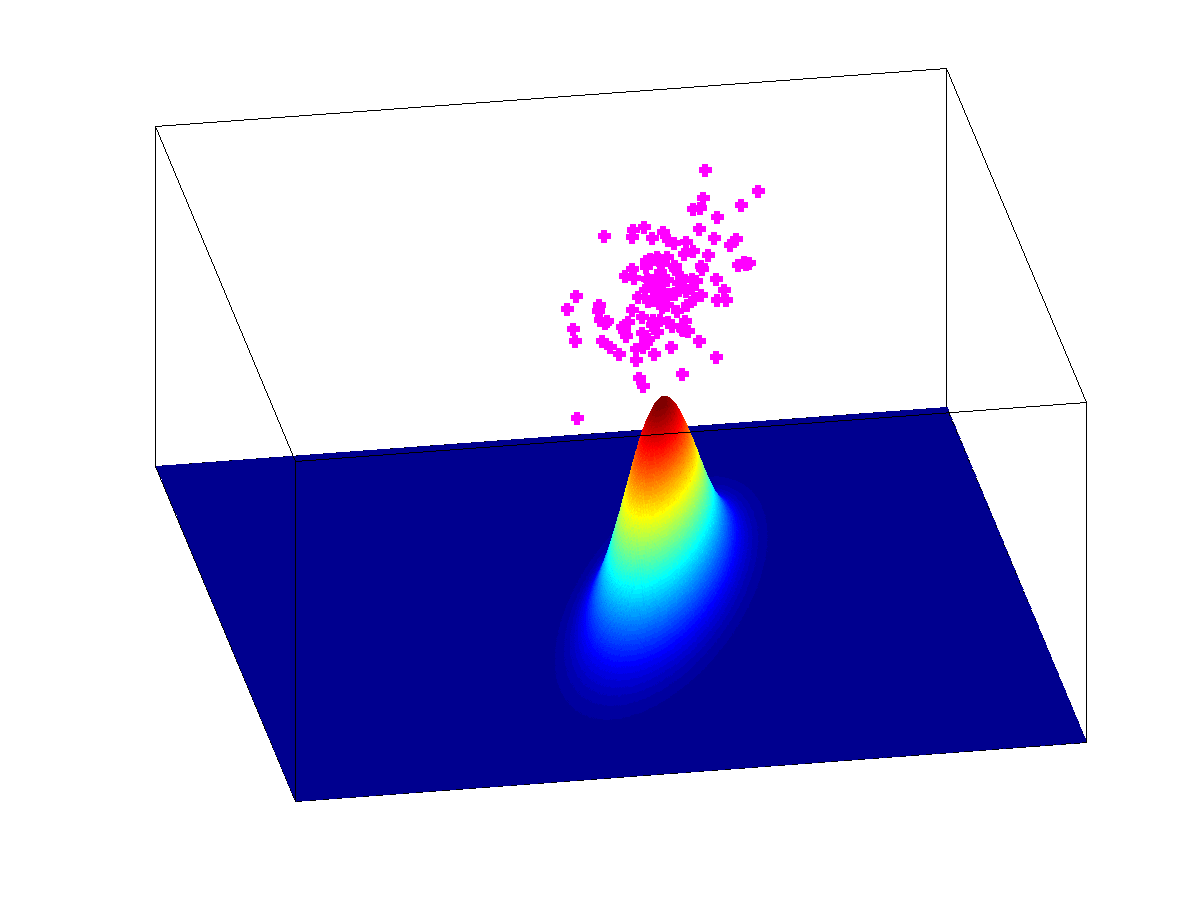

and for $k=\text{blue}$ we have the $P_k$ :

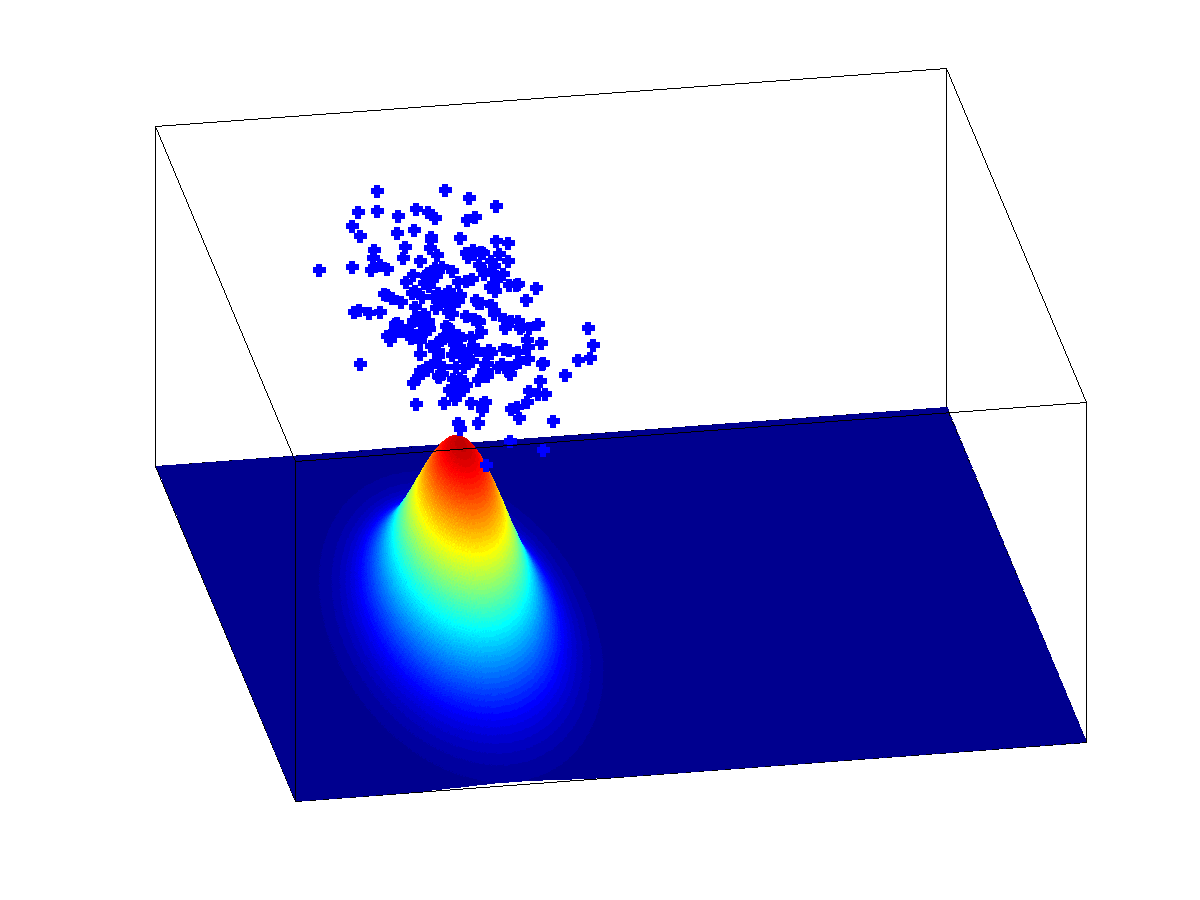

If the label is written $\omega$, one can rewrite this density as :

$$ P(\mathbf{X}) = \sum_{k=1}^3 P(\omega=k) P(\mathbf{X} | \omega = k)$$

Furthermore we can use the Bayes formula to compute the probability that a given observation is produced by one of the class :

$$ P(\omega | \mathbf{X}) = \frac{1}{P(\mathbf{X})} P(\omega=k) P(\mathbf{X} | \omega=k)$$

Given an observation $\mathbf{X}$, we might select the class $\omega$ such that $P(\omega | \mathbf{X})$ is maximal. This is called the **maximum a posteriori** criteria since $P(\omega | \mathbf{X})$ is the *a posteriori* probability that the class is $\omega$.

Note that indeed one need not compute $P(\mathbf{X})$ since this is a scaling factor which is common to all classes for a given $\mathbf{X}$ and hence does not influence for which class $P(\omega | \mathbf{X})$ is maximal.

From the training set, one has to estimate the various $P_k(\mathbf{X}) = P(\mathbf{X} | \omega=k)$, then draw boundaries that splits the space in decision regions based on the **MAP criteria**

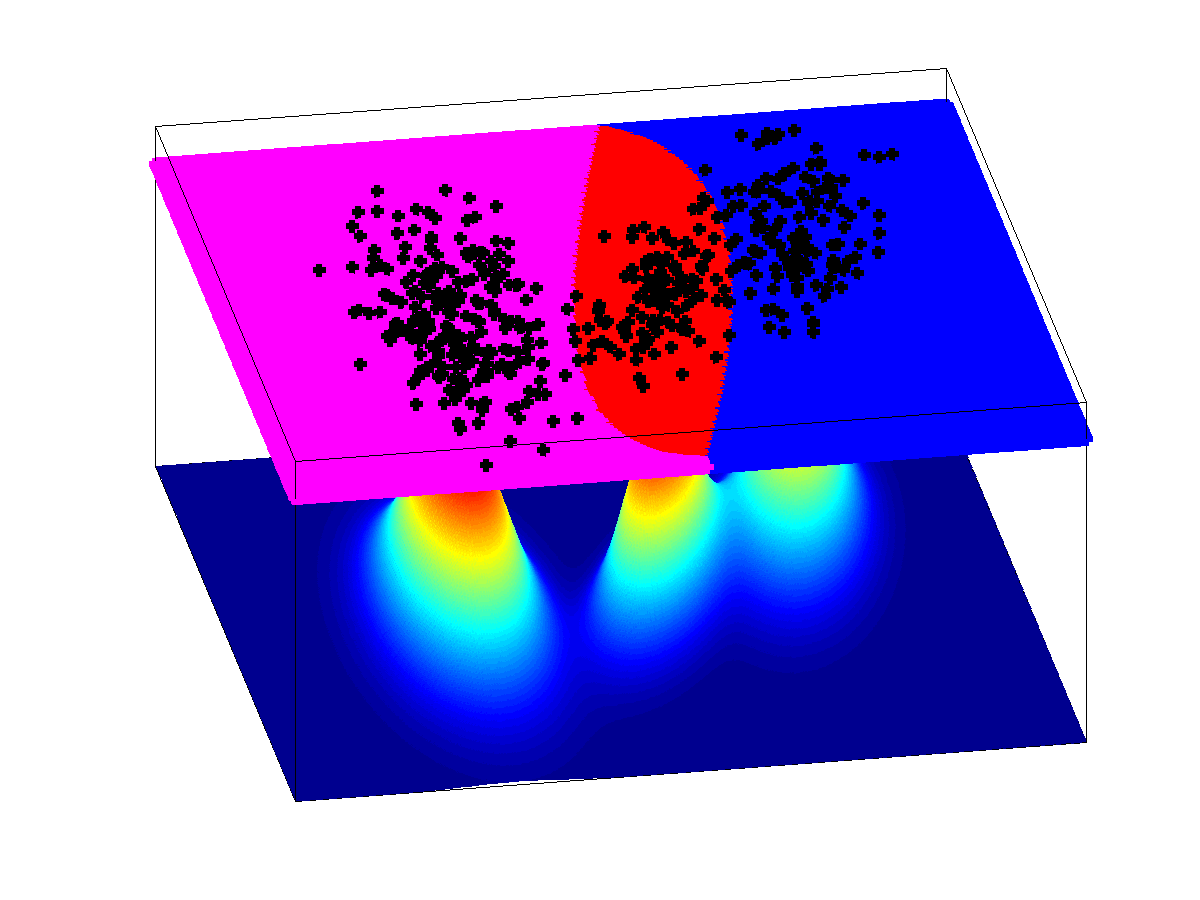

## Naive Bayes classifier

`sklearn.naive_bayes` exposes various classes that perform this alogorithm by estimating the various $P_k(\mathbf{X}) = P(\mathbf{X} | \omega=k)$ using parametric models for these classes. Amongst those, the `sklearn.naive_bayes.GaussianNB` classe uses a normal model for each of the individual class and feature.

That is, $P(\mathbf{X} | \omega=k)$ is a multivariate normal distribution with a diagonal vairance matrix :

$$ P(\mathbf{X} | \omega=k) = \frac{1}{\sqrt{(2\pi)^N |\mathbf{\Sigma}_k}|} \exp\left({-\frac{(\mathbf{X}-\mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{X}-\mathbf{\mu}_k)}{2}}\right)$$

in which $N$ is the total number of features and $\mathbf{\Sigma}_k$ are diagonal matrices.

Looking back to the IRIS dataset (as done before, for logistic regression case) :

In [1]:
%matplotlib inline
import numpy
import numpy.random

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

iris = load_iris()

In [2]:
## Creating the classifier :
clf = GaussianNB()
## Estimating its best parameters :
clf.fit(iris.data, iris.target)
## Applying the classifier on the dataset itself :
y_est = clf.predict(iris.data)

## Getting some figures from this classifier :
print("Number of samples : ",len(iris.target))
print("Classification score:", clf.score(iris.data, iris.target))

Number of samples :  150
Classification score: 0.96


In [3]:
## Computing the score (accuracy score) "by hand"
print("Global classification accuracy/score:", numpy.sum(y_est == iris.target) / len(y_est))

Global classification accuracy/score: 0.96


In [4]:
print(clf.sigma_)

[[0.121764 0.142276 0.029504 0.011264]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


This is giving some _best case_ score since the evaluation of the classifier is performed on the exact same data as the one used to train it !

We can represent this on a 2D plot, _eg_ using the `petal_len` and `petal_wid` features

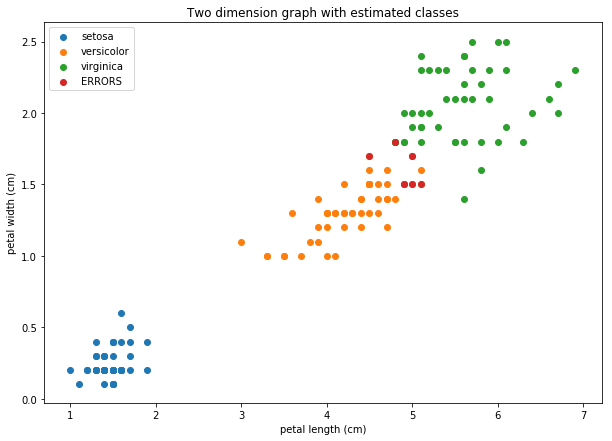

In [5]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#### GRAPHICS
ind1=2
ind2=ind1+1

X = iris.data
pyplot.figure(figsize=[10,7])
for c in numpy.unique(y_est) :
    pyplot.scatter(X[y_est==c, ind1], X[y_est==c, ind2], label=iris.target_names[c], alpha=1)
pyplot.scatter(X[y_est!=iris.target, ind1], X[y_est!=iris.target, ind2], label="ERRORS", alpha=1)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

## Cross validation

To avoid this over-estimation of the score of the classifier it is usefull to split the training set in two subset, one for training the other to assess accuracy of the produced classifier

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.25,
                                                    random_state=567)
## Estimating parameters on the training set :
clf.fit(X_train, y_train)

## Computing the score on testing set :
print("Number of samples:",len(y_train), "for training and:", len(y_test), "for testing")
print("Classification score: {:.3f} (training set)".format(clf.score(X_train, y_train)))
print("Classification score: {:.3f} (testing set)".format(clf.score(X_test, y_test)))

Number of samples: 112 for training and: 38 for testing
Classification score: 0.973 (training set)
Classification score: 0.868 (testing set)


Indeed one might be interested in getting an overall view of what can be expected in terms of stability of the classifier results

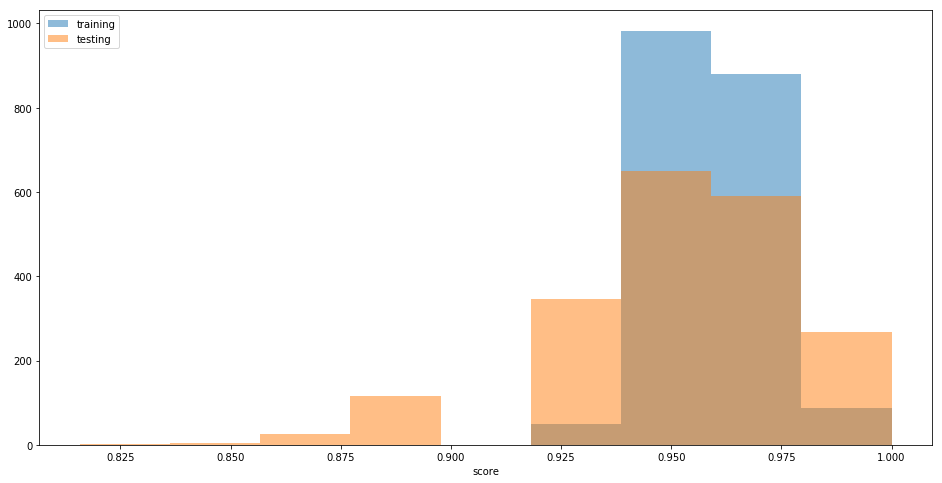

In [7]:
score_test = numpy.empty(2000) # Will be doing 2000 cross-validation runs
score_train = numpy.empty(len(score_test))

pyplot.figure(figsize=(16, 8))

for i in range(0, len(score_test)) :
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)
    clf.fit(X_train, y_train)
    score_test[i] = clf.score(X_test, y_test)
    score_train[i] = clf.score(X_train, y_train)

bins=numpy.linspace(score_test.min(), 1, 10)
pyplot.hist(score_train, bins, alpha=0.5, label="training")
pyplot.hist(score_test, bins, alpha=0.5, label="testing")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

Indeed we can also test which of the iris is _stable in classification_ and which one is not

In [8]:
mc_test = numpy.zeros(len(iris.target), dtype=int)
mc_train = numpy.zeros(len(iris.target), dtype=int)
score_test = numpy.empty(2000) # Will be doing 2000 cross-validation runs
score_train = numpy.empty(len(score_test))

## Adding an extra column to record datapoint index while splitting in training/testing subsets
ind = numpy.array(range(0, len(iris.target)), ndmin=2).T
X = numpy.append(iris.data, ind, axis=1)

In [9]:
for i in range(0, len(score_test)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)
    clf.fit(X_train[:, 0:4], y_train)
    y_train_res=clf.predict(X_train[:, 0:4])
    y_test_res=clf.predict(X_test[:, 0:4])
    score_test[i] = clf.score(X_test[:, 0:4], y_test)
    score_train[i] = clf.score(X_train[:, 0:4], y_train)
    mc_test[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train[X_train[y_train_res != y_train, 4].astype(int)] += 1

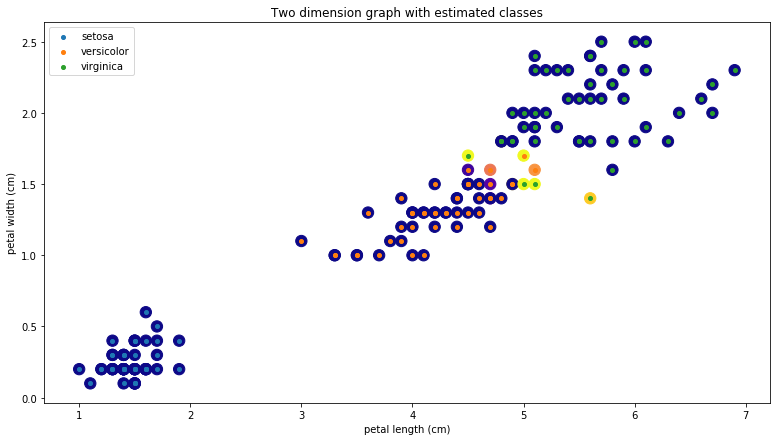

In [10]:
mc_global=mc_test+mc_train

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

## Scaling

We can try here to see if scaling of the initial data has some effects. Here we will use the pipelining interface to obtained a naive-Bayes classifier applying scaling (centering and reducing the data) before applying the classification

In [11]:
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

clf2 = make_pipeline(StandardScaler(copy=True, with_mean=True, with_std=True), GaussianNB())

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

mc_test = numpy.zeros(len(iris.target), dtype=int)
mc_train = numpy.zeros(len(iris.target), dtype=int)
score_test = numpy.empty(2000) # Will be doing 2000 cross-validation runs
score_train = numpy.empty(len(score_test))

## Adding an extra column to record datapoint index while splitting in training/testing subsets
ind = numpy.array(range(0, len(iris.target)), ndmin=2).T
X = numpy.append(iris.data, ind, axis=1)

In [12]:
## The time consuming part : testing all cases :
for i in range(0, len(score_test)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)
    clf2.fit(X_train[:, 0:4], y_train)
    y_train_res=clf2.predict(X_train[:, 0:4])
    y_test_res=clf2.predict(X_test[:, 0:4])
    score_test[i] = clf2.score(X_test[:, 0:4], y_test)
    score_train[i] = clf2.score(X_train[:, 0:4], y_train)
    mc_test[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train[X_train[y_train_res != y_train, 4].astype(int)] += 1

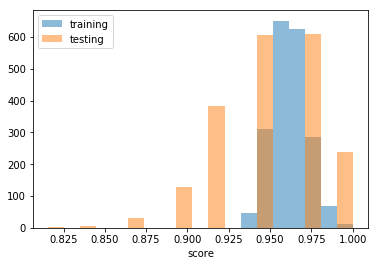

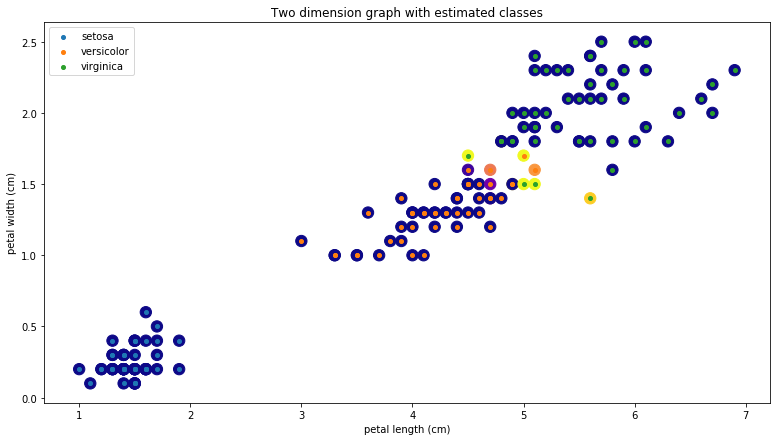

In [13]:
%matplotlib inline

import matplotlib.pyplot as pyplot

## Once done, do som erepresentation of the results :
bins=numpy.linspace(score_test.min(), 1, 20)
pyplot.hist(score_train, bins, alpha=0.5, label="training")
pyplot.hist(score_test, bins, alpha=0.5, label="testing")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

mc_global=mc_test+mc_train

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

There is no effect of the scaling (as long as it is _just a diagonal scaling_, since it is exactly corrected by the inverse scaling of the diagonal terms of the $\mathbf{\Sigma}_k$ variance matrices.

## Training set size

Because each class is modeled with a very limited number of parameters; typically $2N$, twice the number of features : the mean and the vairance of each feature per class; this algorithm should perform well even with a small amount of data in the trianing set provided the model holds.

In [14]:
## Storing the results of previous rounds (when training size=.75 : approx 37 per class).
mc_test_37 = mc_test
mc_train_37 = mc_train
mc_global_37 = mc_global
score_test_37 = score_test
score_train_37 = score_train

In [15]:
## Starting over with much limited training set per class (approx 20 iris) :
clf1 = make_pipeline(GaussianNB())

mc_test_20 = numpy.zeros(len(iris.target), dtype=int)
mc_train_20 = numpy.zeros(len(iris.target), dtype=int)
score_test_20 = numpy.empty(2000) # will be doing 2000 cross-validation runs
score_train_20 = numpy.empty(len(score_test_20))

In [16]:
## The time consuming part : testing all cases :
for i in range(0, len(score_test_20)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.60)
    clf1.fit(X_train[:, 0:4], y_train)
    y_train_res=clf1.predict(X_train[:, 0:4])
    y_test_res=clf1.predict(X_test[:, 0:4])
    score_test_20[i] = clf1.score(X_test[:, 0:4], y_test)
    score_train_20[i] = clf1.score(X_train[:, 0:4], y_train)
    mc_test_20[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train_20[X_train[y_train_res != y_train, 4].astype(int)] += 1

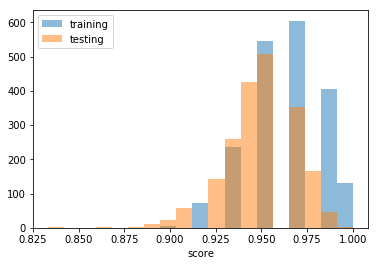

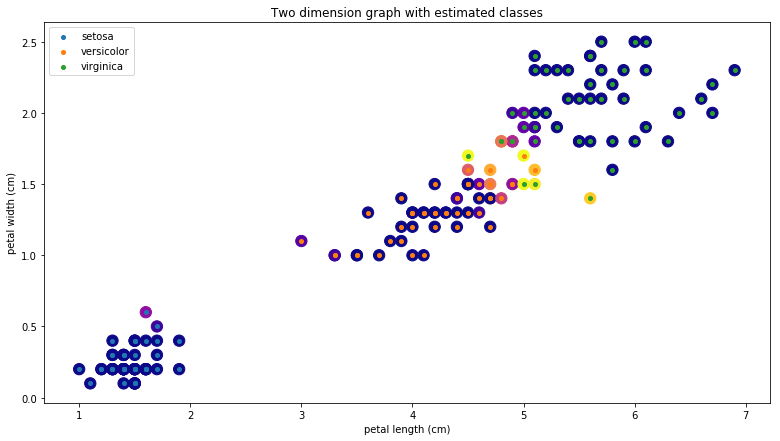

In [17]:
## The display now :
## Once done, do som erepresentation of the results :
bins=numpy.linspace(score_test_20.min(), 1, 20)
pyplot.hist(score_train_20, bins, alpha=0.5, label="training")
pyplot.hist(score_test_20, bins, alpha=0.5, label="testing")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

mc_global_20=mc_test_20+mc_train_20

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global_20), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

## Projections

One important apsect of the **`sklearn.naive_bayes.GaussianNB`** class is that it assumes a diagonal variance matrix on each class. Hence it should work best when the basis used to represent the data is such that the covariance matrices $\mathbf{\Sigma}_k$ are **jointly** as diagonal as possible.

One such basis is, *somtimes*, provided by the PCA (but beware of **_the Simpson's paradox_** !).

The **iris dataset** seems not suffer from this paradox, hence we might combine PCA and Gaussian naive-Bayes classifier.

**NB** Since we are using PCA to re-parametrise the feature space, _scaling_ **has an effect**. Here we choose not to scale (_cf._ course on PCA and use of scaling).

In [18]:
import numpy
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

clf3 = make_pipeline(PCA(n_components=4), GaussianNB())

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

mc_test_20PCA = numpy.zeros(len(iris.target), dtype=int)
mc_train_20PCA = numpy.zeros(len(iris.target), dtype=int)
score_test_20PCA = numpy.empty(2000)
score_train_20PCA = numpy.empty(len(score_test_20PCA))

## Adding an extra column to record datapoint index while splitting in training/testing subsets
ind = numpy.array(range(0, len(iris.target)), ndmin=2).T
X = numpy.append(iris.data, ind, axis=1)

In [19]:
## The time consuming part : testing all cases :
for i in range(0, len(score_test_20PCA)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.60)
    clf3.fit(X_train[:, 0:4], y_train)
    y_train_res=clf3.predict(X_train[:, 0:4])
    y_test_res=clf3.predict(X_test[:, 0:4])
    score_test_20PCA[i] = clf3.score(X_test[:, 0:4], y_test)
    score_train_20PCA[i] = clf3.score(X_train[:, 0:4], y_train)
    mc_test_20PCA[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train_20PCA[X_train[y_train_res != y_train, 4].astype(int)] += 1

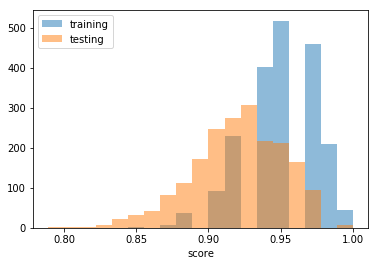

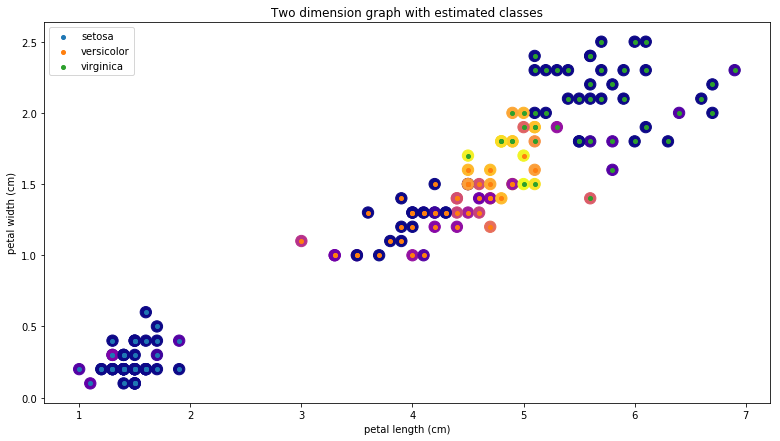

In [20]:
%matplotlib inline
import matplotlib.pyplot as pyplot

## The display now :
## Once done, do som erepresentation of the results :
bins=numpy.linspace(score_test_20PCA.min(), 1, 20)
pyplot.hist(score_train_20PCA, bins, alpha=0.5, label="training")
pyplot.hist(score_test_20PCA, bins, alpha=0.5, label="testing")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

mc_global_20PCA=mc_test_20PCA+mc_train_20PCA

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global_20PCA), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

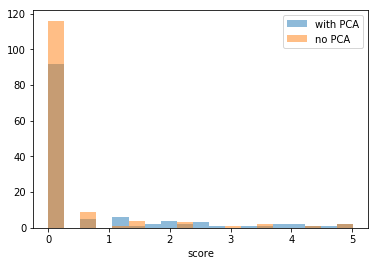

In [21]:
## Once done, do som erepresentation of the results :
bins=numpy.linspace(0, numpy.log(len(mc_global_20PCA)), 20)
pyplot.hist(numpy.log(1+mc_global_20PCA), bins, alpha=0.5, label="with PCA")
pyplot.hist(numpy.log(1+mc_global_20), bins, alpha=0.5, label="no PCA")
pyplot.legend(loc='upper right')
pyplot.xlabel("score")
pyplot.show()


Because of the number of parameters used to caracterise the **PCA** we suffer much more from the low amount of training data points.

In [22]:
mc_test_37PCA = numpy.zeros(len(iris.target), dtype=int)
mc_train_37PCA = numpy.zeros(len(iris.target), dtype=int)
score_test_37PCA = numpy.empty(2000)
score_train_37PCA = numpy.empty(len(score_test_37PCA))

In [23]:
## The time consuming part : testing all cases :
for i in range(0, len(score_test_37PCA)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)
    clf3.fit(X_train[:, 0:4], y_train)
    y_train_res=clf3.predict(X_train[:, 0:4])
    y_test_res=clf3.predict(X_test[:, 0:4])
    score_test_37PCA[i] = clf3.score(X_test[:, 0:4], y_test)
    score_train_37PCA[i] = clf3.score(X_train[:, 0:4], y_train)
    mc_test_37PCA[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train_37PCA[X_train[y_train_res != y_train, 4].astype(int)] += 1

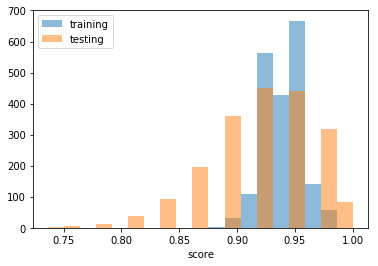

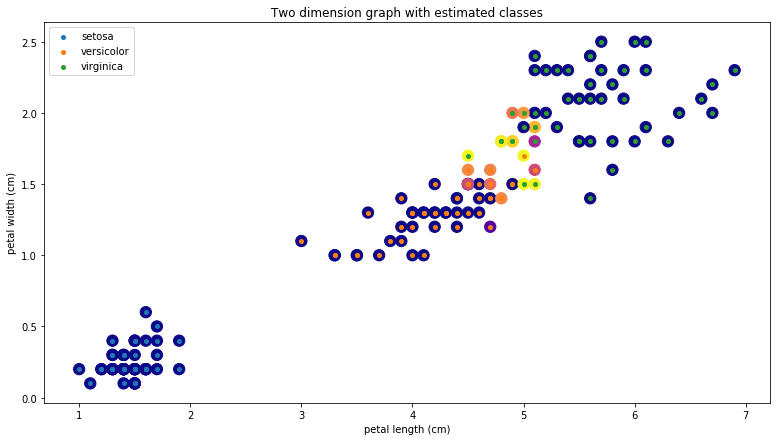

In [24]:
bins=numpy.linspace(score_test_37PCA.min(), 1, 20)
pyplot.hist(score_train_37PCA, bins, alpha=0.5, label="training")
pyplot.hist(score_test_37PCA, bins, alpha=0.5, label="testing")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

mc_global_37PCA=mc_test_37PCA+mc_train_37PCA

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global_37PCA), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

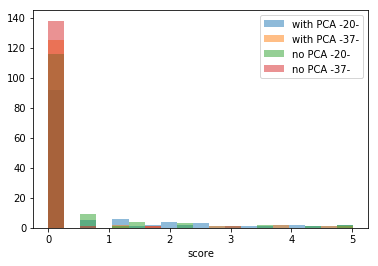

In [25]:
## Once done, do som erepresentation of the results :
bins=numpy.linspace(0, numpy.log(len(mc_global_20PCA)), 20)
pyplot.hist(numpy.log(1+mc_global_20PCA), bins, alpha=0.5, label="with PCA -20-")
pyplot.hist(numpy.log(1+mc_global_37PCA), bins, alpha=0.5, label="with PCA -37-")
pyplot.hist(numpy.log(1+mc_global_20), bins, alpha=0.5, label="no PCA -20-")
pyplot.hist(numpy.log(1+mc_global_37), bins, alpha=0.5, label="no PCA -37-")
pyplot.legend(loc='upper right')
pyplot.xlabel("score")
pyplot.show()


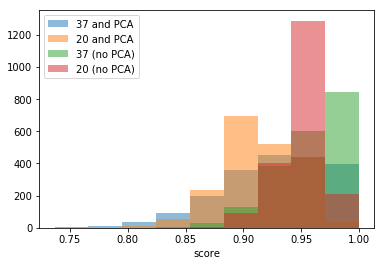

In [26]:
## And now, most interestingly compare all _testing_ values :

bins=numpy.linspace(score_test_37PCA.min(), 1, 10)
pyplot.hist(score_test_37PCA, bins, alpha=0.5, label="37 and PCA")
pyplot.hist(score_test_20PCA, bins, alpha=0.5, label="20 and PCA")
pyplot.hist(score_test_37, bins, alpha=0.5, label="37 (no PCA)")
pyplot.hist(score_test_20, bins, alpha=0.5, label="20 (no PCA)")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

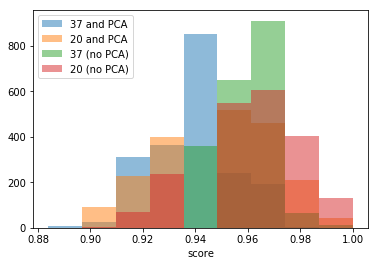

In [27]:
bins=numpy.linspace(score_train_37PCA.min(), 1, 10)
pyplot.hist(score_train_37PCA, bins, alpha=0.5, label="37 and PCA")
pyplot.hist(score_train_20PCA, bins, alpha=0.5, label="20 and PCA")
pyplot.hist(score_train_37, bins, alpha=0.5, label="37 (no PCA)")
pyplot.hist(score_train_20, bins, alpha=0.5, label="20 (no PCA)")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()


# Importance of Feature Scaling


Feature scaling through standardization (or Z-score normalization)
can be an important preprocessing step for many machine learning
algorithms. Standardization involves rescaling the features such
that they have the properties of a standard normal distribution
with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic
regression) require features to be normalized, intuitively we can
think of Principle Component Analysis (PCA) as being a prime example
of when normalization is important. In PCA we are interested in the
components that maximize the variance. If one component (e.g. human
height) varies less than another (e.g. weight) because of their
respective scales (meters vs. kilos), PCA might determine that the
direction of maximal variance more closely corresponds with the
'weight' axis, if those features are not scaled. As a change in
height of one meter can be considered much more important than the
change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with
:class:`StandardScaler <sklearn.preprocessing.StandardScaler>` applied,
to unscaled data. The results are visualized and a clear difference noted.
The 1st principal component in the unscaled set can be seen. It can be seen
that feature #13 dominates the direction, being a whole two orders of
magnitude above the other features. This is contrasted when observing
the principal component for the scaled version of the data. In the scaled
version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset
has continuous features that are heterogeneous in scale due to differing
properties that they measure (i.e alcohol content, and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a
clear difference in prediction accuracies is observed wherein the dataset
which is scaled before PCA vastly outperforms the unscaled version.




In [28]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import sklearn
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

print("VERSION",sklearn.__version__)


Automatically created module for IPython interactive environment
VERSION 0.19.2



Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


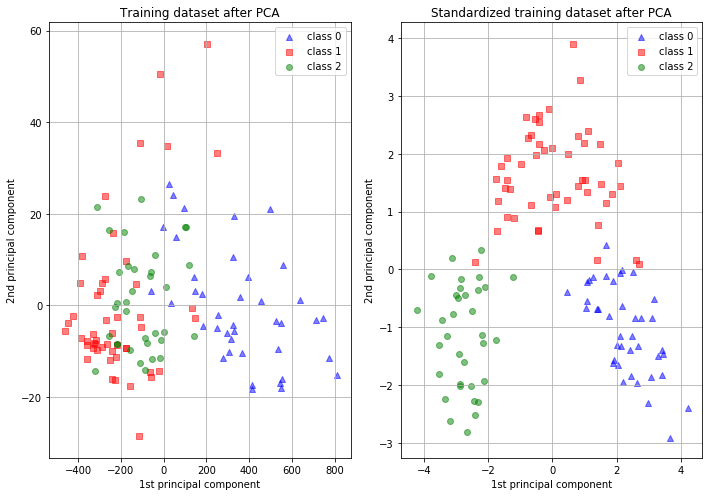

In [29]:
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

# Linear and Quadratic Discriminant Analysis with covariance ellipsoid

## Assumption

The analysis is quite sensitive to outliers and the size of the smallest group must be larger than the number of predictor variables.

* Multivariate normality: Independent variables are normal for each level of the grouping variable.
* Homogeneity of variance/covariance (homoscedasticity): Variances among group variables are the same across levels of predictors. Can be tested with Box's M statistic. It has been suggested, however, that linear discriminant analysis be used when covariances are equal, and that quadratic discriminant analysis may be used when covariances are not equal.
* Multicollinearity: Predictive power can decrease with an increased correlation between predictor variables.
* Independence: Participants are assumed to be randomly sampled, and a participant's score on one variable is assumed to be independent of scores on that variable for all other participants.

It has been suggested that discriminant analysis is relatively robust to slight violations of these assumptions, and it has also been shown that discriminant analysis may still be reliable when using dichotomous variables (where multivariate normality is often violated).

# Linear Disciminant Analysis (LDA)

First let see the constructor of the LDA and explain the parameters.

In [ ]:
# here the documentation of the LDA module.
print(LinearDiscriminantAnalysis.__doc__)

| Methods | |
|----------------------|--------------------------------------------------|
| decision_function(X) | 	        Predict confidence scores for samples.|
| fit(X, y): |	                    Fit model according to the given training data and parameters.|
| fit_transform(X[, y]): |	        Fit to data, then transform it.|
| get_params([deep]): |	            Get parameters for this estimator.|
| predict(X): |	                    Predict class labels for samples in X.|
| predict_log_proba(X): |	        Estimate log probability.|
| predict_proba(X): |	            Estimate probability.|
| score(X, y[, sample_weight]):| 	Returns the mean accuracy on the given test data and labels.|
| set_params(****params): |	        Set the parameters of this estimator.|
| transform(X): |	                Project data to maximize class separation.|

In [31]:
lda = LinearDiscriminantAnalysis()

# and here the documentation of the fit method.
print(lda.fit.__doc__)

Fit LinearDiscriminantAnalysis model according to the given
           training data and parameters.

           .. versionchanged:: 0.19
              *store_covariance* has been moved to main constructor.

           .. versionchanged:: 0.19
              *tol* has been moved to main constructor.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        y : array, shape (n_samples,)
            Target values.
        


In [32]:
# example of the lda API usage

# 6 samples of the training dataset with 2 features each.
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# the target values of each sample.
y = np.array([1, 1, 1, 2, 2, 2])

# now train the LDA.
print(lda.get_params())
lda.fit(X, y)
print(lda.get_params())

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


In [33]:
print(lda.predict.__doc__)

Predict class labels for samples in X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Samples.

        Returns
        -------
        C : array, shape = [n_samples]
            Predicted class label per sample.
        


In [34]:
# just predict target for new samples.
lda.predict([[-0.8, -1], [0.5, 0.5], [1, 1]])

array([1, 2, 2])

### Exercice 1
* just plot the dataset with the right label, using `numpy.unique`, `plt.scatter`, `predict`.

1
2


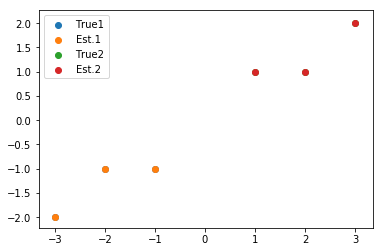

### Exercice 2

plot the plan which separate the two categories, using

`numpy.meshgrid`, `numpy.unique`, `predict_proba`, `plt.colormesh`, `plt.contour`

In [36]:
print(lda.predict_proba.__doc__)

Estimate probability.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Input data.

        Returns
        -------
        C : array, shape (n_samples, n_classes)
            Estimated probabilities.
        


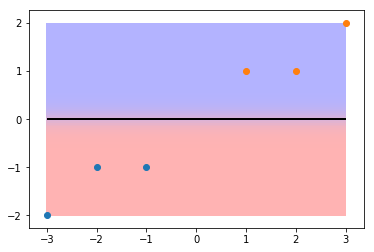

### Exercice 3

* extend this exemple to two dataset of 300 samples with the same normal distribution.
* increaze the C parameter and observe the plan

No handles with labels found to put in legend.


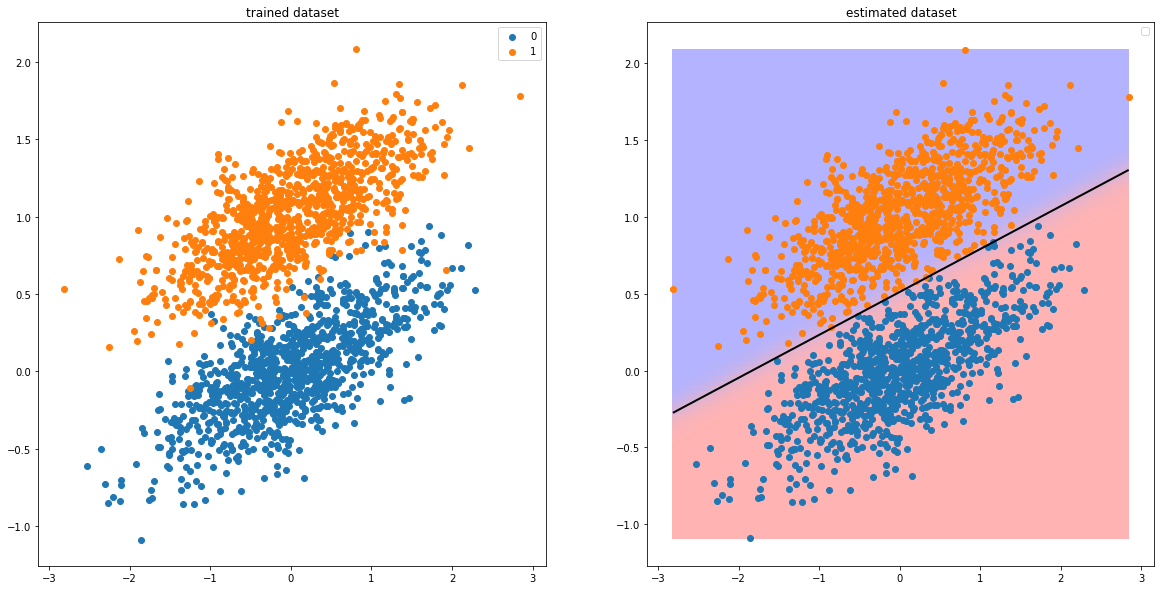

## QDA

In [39]:
# here the documentation of the LDA module.
print(QuadraticDiscriminantAnalysis.__doc__)

Quadratic Discriminant Analysis

    A classifier with a quadratic decision boundary, generated
    by fitting class conditional densities to the data
    and using Bayes' rule.

    The model fits a Gaussian density to each class.

    .. versionadded:: 0.17
       *QuadraticDiscriminantAnalysis*

    Read more in the :ref:`User Guide <lda_qda>`.

    Parameters
    ----------
    priors : array, optional, shape = [n_classes]
        Priors on classes

    reg_param : float, optional
        Regularizes the covariance estimate as
        ``(1-reg_param)*Sigma + reg_param*np.eye(n_features)``

    store_covariance : boolean
        If True the covariance matrices are computed and stored in the
        `self.covariance_` attribute.

        .. versionadded:: 0.17

    tol : float, optional, default 1.0e-4
        Threshold used for rank estimation.

        .. versionadded:: 0.17

    Attributes
    ----------
    covariance_ : list of array-like, shape = [n_features, n_features]
      

| Methods | |
|----------------------|--------------------------------------------------|
| decision_function(X) | 	        Predict confidence scores for samples.|
| fit(X, y): |	                    Fit model according to the given training data and parameters.|
| get_params([deep]): |	            Get parameters for this estimator.|
| predict(X): |	                    Predict class labels for samples in X.|
| predict_log_proba(X): |	        Estimate log probability.|
| predict_proba(X): |	            Estimate probability.|
| score(X, y[, sample_weight]):| 	Returns the mean accuracy on the given test data and labels.|
| set_params(****params): |	        Set the parameters of this estimator.|

In [40]:
qda = QuadraticDiscriminantAnalysis()

# and here the documentation of the fit method.
print(qda.fit.__doc__)

Fit the model according to the given training data and parameters.

            .. versionchanged:: 0.19
               ``store_covariances`` has been moved to main constructor as
               ``store_covariance``

            .. versionchanged:: 0.19
               ``tol`` has been moved to main constructor.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.

        y : array, shape = [n_samples]
            Target values (integers)
        


In [41]:
# example of the qda API usage

# 6 samples of the training dataset with 2 features each.
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# the target values of each sample.
y = np.array([1, 1, 1, 2, 2, 2])

# now train the LDA.
print(qda.get_params())
qda.fit(X, y)
print(qda.get_params())

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'store_covariances': None, 'tol': 0.0001}
{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'store_covariances': None, 'tol': 0.0001}


In [42]:
print(qda.predict.__doc__)

Perform classification on an array of test vectors X.

        The predicted class C for each sample in X is returned.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]

        Returns
        -------
        C : array, shape = [n_samples]
        


In [43]:
# just predict target for new samples.
qda.predict([[-0.8, -1], [0.5, 0.5], [1, 1]])

array([1, 2, 2])

### Exercice 4
* just plot the dataset with the right label, using `numpy.unique`, `plt.scatter`, `predict`.

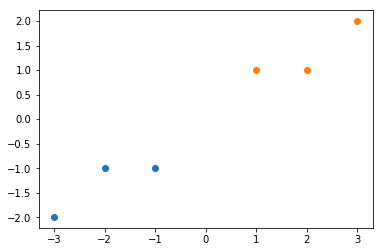

### Exercice 5

plot the plan which separate the two categories, using

`numpy.meshgrid`, `numpy.unique`, `predict_proba`, `plt.colormesh`, `plt.contour`

In [45]:
print(qda.predict_proba.__doc__)

Return posterior probabilities of classification.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Array of samples/test vectors.

        Returns
        -------
        C : array, shape = [n_samples, n_classes]
            Posterior probabilities of classification per class.
        


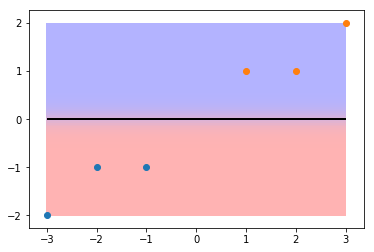

### Exercice 6

* extend this exemple to two dataset of 300 samples with the same normal distribution.
* increaze the C parameter and observe the plan

No handles with labels found to put in legend.


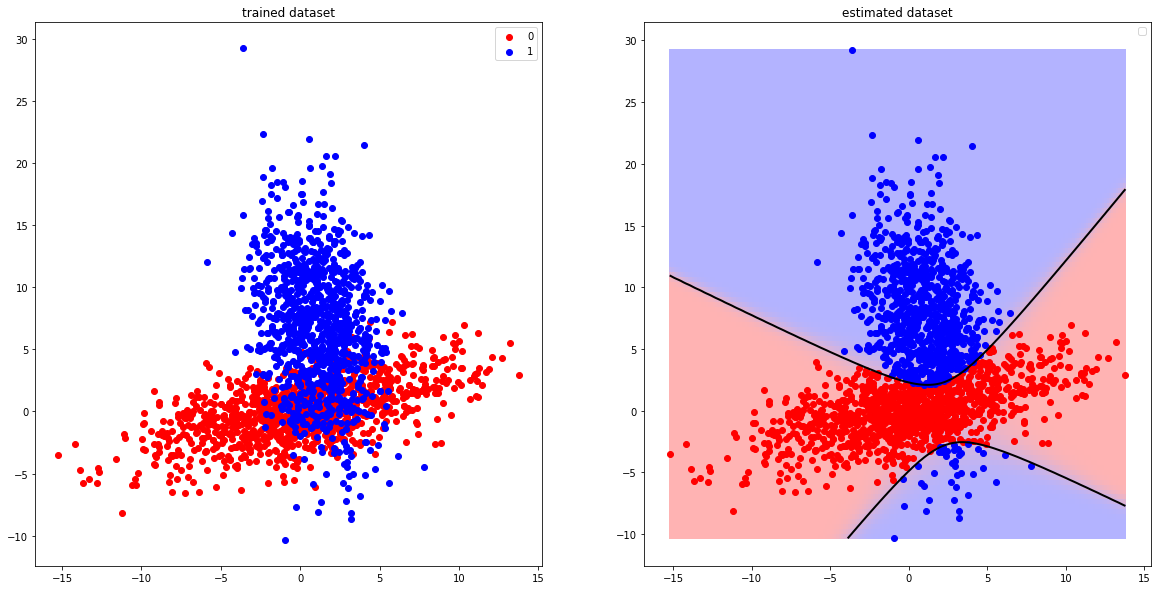

## Comparison of LDA and QDA.

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.

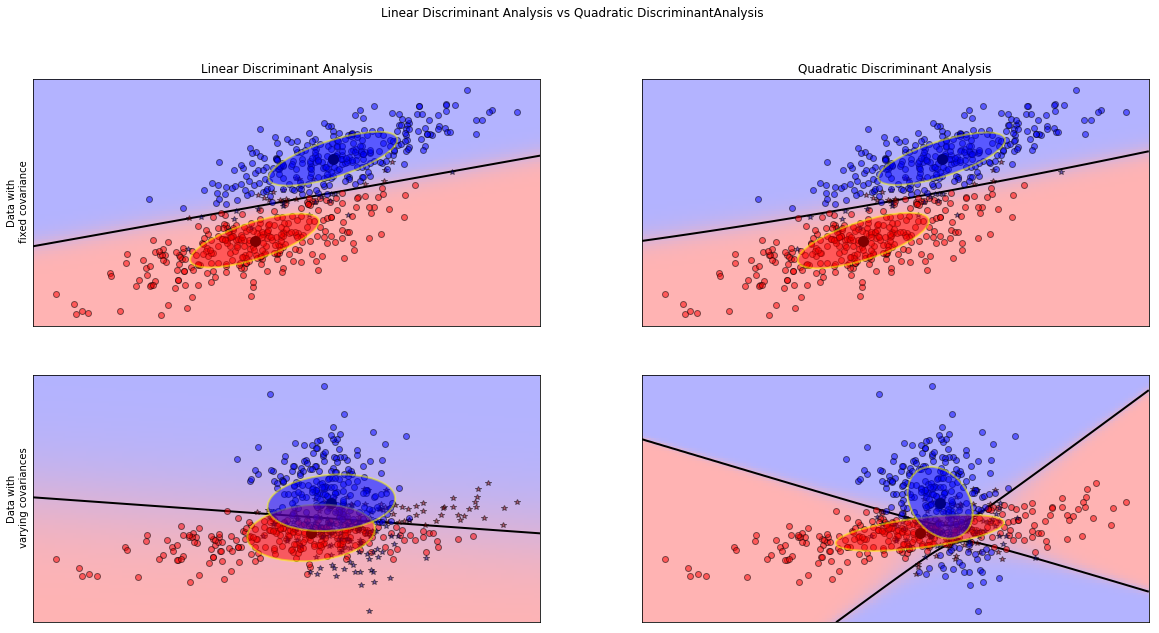

In [50]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


plt.figure(figsize=(20,10))

# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

### The Iris return.

Number of samples :  150
Classification score (LDA): 0.98


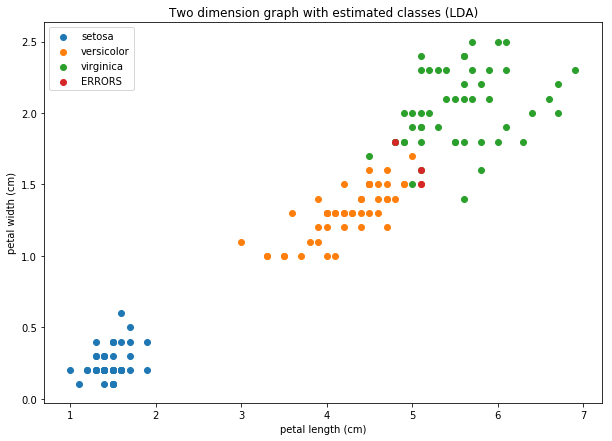

Number of samples :  150
Classification score (QDA): 0.98


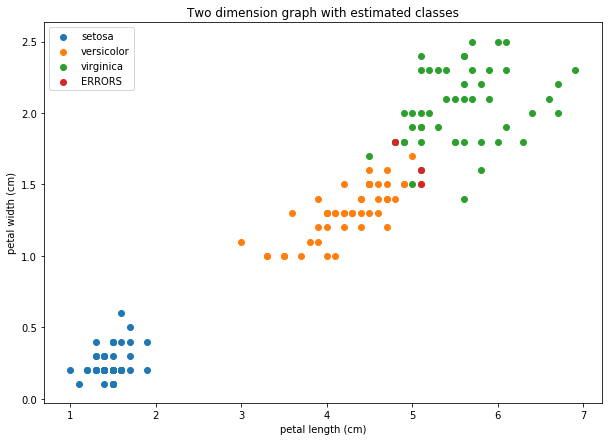

In [51]:
data = load_iris()
X = data.data
y = data.target

# LDA
lda.fit(X, y)
y_est = lda.predict(X)

print("Number of samples : ",len(y))
print("Classification score (LDA):", lda.score(X, y))

#### GRAPHICS
ind1=2
ind2=ind1+1

plt.figure(figsize=[10,7])
for c in np.unique(y_est) :
    plt.scatter(X[y_est==c, ind1], X[y_est==c, ind2], label=data.target_names[c], alpha=1)
plt.scatter(X[y_est!=y, ind1], X[y_est!=y, ind2], label="ERRORS", alpha=1)

plt.title('Two dimension graph with estimated classes (LDA)')
plt.legend()
plt.xlabel(data.feature_names[ind1])
plt.ylabel(data.feature_names[ind2])
plt.show()


# QDA
qda.fit(X, y)
y_est = qda.predict(X)

print("Number of samples : ",len(y))
print("Classification score (QDA):", qda.score(X, y))

#### GRAPHICS

plt.figure(figsize=[10,7])
for c in np.unique(y_est) :
    plt.scatter(X[y_est==c, ind1], X[y_est==c, ind2], label=data.target_names[c], alpha=1)
plt.scatter(X[y_est!=y, ind1], X[y_est!=y, ind2], label="ERRORS", alpha=1)

plt.title('Two dimension graph with estimated classes')
plt.legend()
plt.xlabel(data.feature_names[ind1])
plt.ylabel(data.feature_names[ind2])

plt.show()

# Non parametric classifier : (k-)Nearest Neighbor(s)

The main idea behind _Neraest Neighbors_ method is to caractersie a new datapoint by finding its nearest neighbor(s) amongst the training data set. Then one can assign a label to the new datapoint on the basis of the class(es) of these neighbors.

As such, the method is not imposing any model on the density of the dataset, whether the training or the testing/usage dataset. Still this classification depends on the fact that classes are smooth, that is that we are using a metric on the data space for which the support of each class has some regularities and are as disjunct as possible.

To apply this family of algorithm, **`sklearn`** is providing the `sklearn.neighbors` submodule proposing a large family of algorithms based on neighbors to determine classification, estimation or clustering.

We will test the simplest one of those : the k-NN classifier (**`sklearn.neighbors.KNeighborsClassifier`**)

In [52]:
%matplotlib inline
import numpy
import numpy.random

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

In [53]:
## Creating the classifier :
clf = KNeighborsClassifier()
## Estimating its best parameters :
clf.fit(iris.data, iris.target)
## Applying the classifier on the dataset itself :
y_est = clf.predict(iris.data)

## Getting some figures from this classifier :
print("Number of samples : ",len(iris.target))
print("Classification score:", clf.score(iris.data, iris.target))

Number of samples :  150
Classification score: 0.9666666666666667


By default the __[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)__ is selecting `k=5`. We could go to a smaller amount

In [54]:
## Using a single neighbor :
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(iris.data, iris.target)
y_est = clf.predict(iris.data)

## Getting some figures from this classifier :
print("Number of samples : ",len(iris.target))
print("Classification score:", clf.score(iris.data, iris.target))

Number of samples :  150
Classification score: 1.0


This is clearly over-fitting since each data point is its own nearest neighbor : hence this will always provide 100% accuracy score on the training dataset !

To have a good assessment of the quality of this classifier it is crucial to use cross validation

In [55]:
## Adding an extra column to record datapoint index while splitting in training/testing subsets
ind = numpy.array(range(0, len(iris.target)), ndmin=2).T
X = numpy.append(iris.data, ind, axis=1)

mc_test_37_k1 = numpy.zeros(len(iris.target), dtype=int)
mc_train_37_k1 = numpy.zeros(len(iris.target), dtype=int)
score_test_37_k1 = numpy.empty(2000)
score_train_37_k1 = numpy.empty(len(score_test_37_k1))

mc_test_37_k5 = numpy.zeros(len(iris.target), dtype=int)
mc_train_37_k5 = numpy.zeros(len(iris.target), dtype=int)
score_test_37_k5 = numpy.empty(2000)
score_train_37_k5 = numpy.empty(len(score_test_37_k5))

clf_k1 = KNeighborsClassifier(n_neighbors=1)
clf_k5 = KNeighborsClassifier(n_neighbors=5)

In [56]:
from sklearn.model_selection import train_test_split

## The time consuming part : testing all cases :
for i in range(0, len(score_test_37_k1)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)
    clf_k1.fit(X_train[:, 0:4], y_train)
    y_train_res=clf_k1.predict(X_train[:, 0:4])
    y_test_res=clf_k1.predict(X_test[:, 0:4])
    score_test_37_k1[i] = clf_k1.score(X_test[:, 0:4], y_test)
    score_train_37_k1[i] = clf_k1.score(X_train[:, 0:4], y_train)
    mc_test_37_k1[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train_37_k1[X_train[y_train_res != y_train, 4].astype(int)] += 1
    
    clf_k5.fit(X_train[:, 0:4], y_train)
    y_train_res=clf_k5.predict(X_train[:, 0:4])
    y_test_res=clf_k5.predict(X_test[:, 0:4])
    score_test_37_k5[i] = clf_k5.score(X_test[:, 0:4], y_test)
    score_train_37_k5[i] = clf_k5.score(X_train[:, 0:4], y_train)
    mc_test_37_k5[X_test[y_test_res != y_test, 4].astype(int)] += 1
    mc_train_37_k5[X_train[y_train_res != y_train, 4].astype(int)] += 1

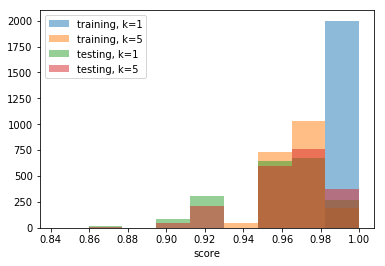

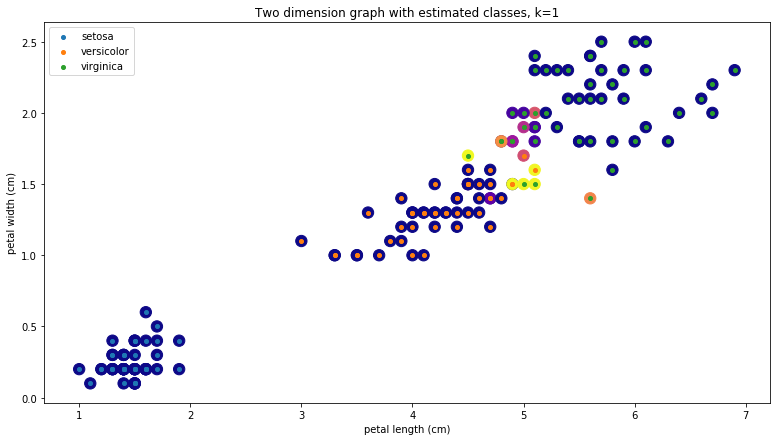

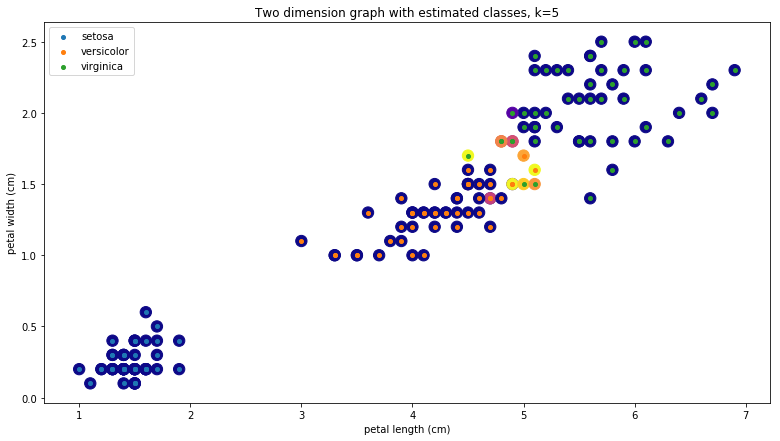

In [57]:
%matplotlib inline

import matplotlib.pyplot as pyplot

## Once done, do some representation of the results :
bins=numpy.linspace(score_test_37_k1.min(), 1, 10)
pyplot.hist(score_train_37_k1, bins, alpha=0.5, label="training, k=1")
pyplot.hist(score_train_37_k5, bins, alpha=0.5, label="training, k=5")
pyplot.hist(score_test_37_k1, bins, alpha=0.5, label="testing, k=1")
pyplot.hist(score_test_37_k5, bins, alpha=0.5, label="testing, k=5")
pyplot.legend(loc='upper left')
pyplot.xlabel("score")
pyplot.show()

mc_global_37_k1=mc_test_37_k1+mc_train_37_k1
mc_global_37_k5=mc_test_37_k5+mc_train_37_k5

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global_37_k1), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes, k=1')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

pyplot.figure(figsize=[13,7])
pyplot.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc_global_37_k5), cmap='plasma', alpha=1, s=128)
for c in numpy.unique(iris.target) :
    pyplot.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

pyplot.title('Two dimension graph with estimated classes, k=5')
pyplot.legend()
pyplot.xlabel(iris.feature_names[ind1])
pyplot.ylabel(iris.feature_names[ind2])
pyplot.show()

## Effect of scaling

The scaling has an effect on the distance, hence it has an effect on which are the nearest neighbors…

Let's try that…

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

mc_test_37_k1_scaled = numpy.zeros(len(iris.target), dtype=int)
mc_train_37_k1_scaled = numpy.zeros(len(iris.target), dtype=int)
score_test_37_k1_scaled = numpy.empty(2000)
score_train_37_k1_scaled = numpy.empty(len(score_test_37_k1_scaled))

mc_test_37_k5_scaled = numpy.zeros(len(iris.target), dtype=int)
mc_train_37_k5_scaled = numpy.zeros(len(iris.target), dtype=int)
score_test_37_k5_scaled = numpy.empty(2000)
score_train_37_k5_scaled = numpy.empty(len(score_test_37_k5_scaled))

clf_k1_std = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
clf_k5_std = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

In [59]:
from sklearn.model_selection import train_test_split

## The time consuming part : testing all cases :
for i in range(0, len(score_test_37_k1_scaled)) :
    X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)
    
    clf_k1_std.fit(X_train[:, 0:4], y_train)
    y_train_res_scaled=clf_k1_std.predict(X_train[:, 0:4])
    y_test_res_scaled=clf_k1_std.predict(X_test[:, 0:4])
    score_test_37_k1_scaled[i] = clf_k1_std.score(X_test[:, 0:4], y_test)
    score_train_37_k1_scaled[i] = clf_k1_std.score(X_train[:, 0:4], y_train)
    mc_test_37_k1_scaled[X_test[y_test_res_scaled != y_test, 4].astype(int)] += 1
    mc_train_37_k1_scaled[X_train[y_train_res_scaled != y_train, 4].astype(int)] += 1
    
    clf_k5_std.fit(X_train[:, 0:4], y_train)
    y_train_res_scaled=clf_k5_std.predict(X_train[:, 0:4])
    y_test_res_scaled=clf_k5_std.predict(X_test[:, 0:4])
    score_test_37_k5_scaled[i] = clf_k5_std.score(X_test[:, 0:4], y_test)
    score_train_37_k5_scaled[i] = clf_k5_std.score(X_train[:, 0:4], y_train)
    mc_test_37_k5_scaled[X_test[y_test_res_scaled != y_test, 4].astype(int)] += 1
    mc_train_37_k5_scaled[X_train[y_train_res_scaled != y_train, 4].astype(int)] += 1

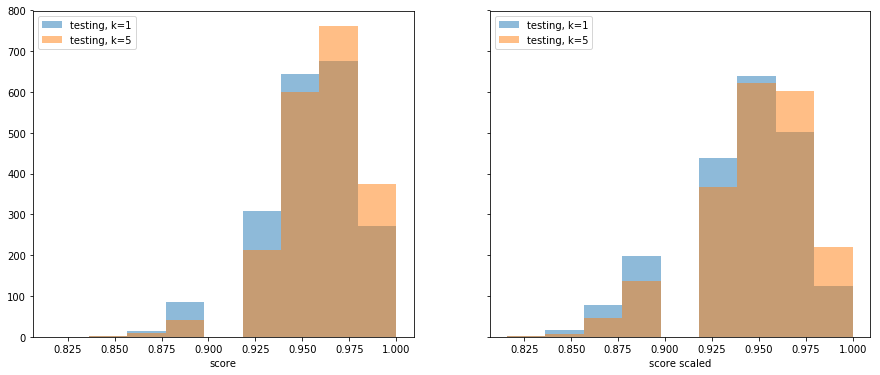

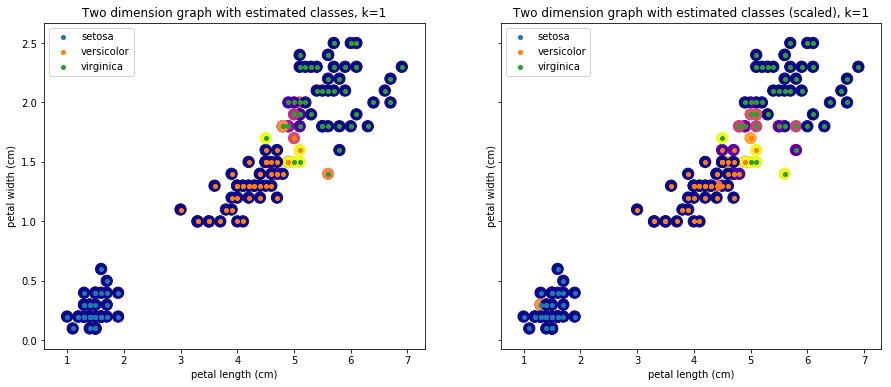

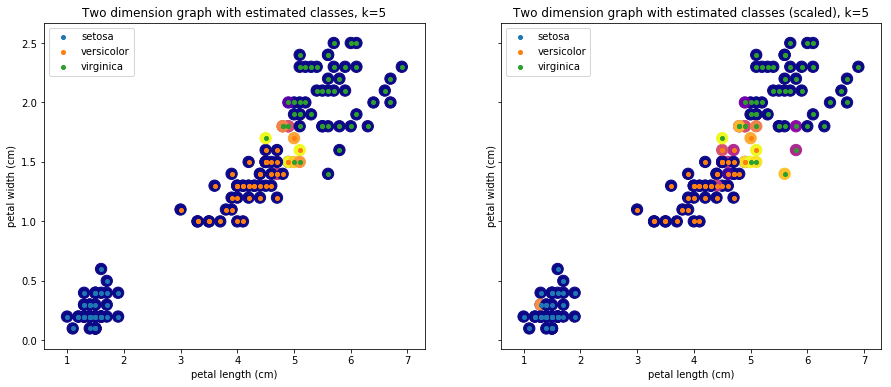

In [60]:
%matplotlib inline

import matplotlib.pyplot as pyplot

## Once done, do some representation of the results :
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

bins=numpy.linspace(score_test_37_k1_scaled.min(), 1, 10)
ax0.hist(score_test_37_k1, bins, alpha=0.5, label="testing, k=1")
ax0.hist(score_test_37_k5, bins, alpha=0.5, label="testing, k=5")
ax0.legend(loc='upper left')
ax0.set_xlabel("score")

## Once done, do some representation of the results :
ax1.hist(score_test_37_k1_scaled, bins, alpha=0.5, label="testing, k=1")
ax1.hist(score_test_37_k5_scaled, bins, alpha=0.5, label="testing, k=5")
ax1.legend(loc='upper left')
ax1.set_xlabel("score scaled")

pyplot.show()

mc_global_37_k1_scaled=mc_test_37_k1_scaled+mc_train_37_k1_scaled
mc_global_37_k5_scaled=mc_test_37_k5_scaled+mc_train_37_k5_scaled

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

# k1
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

for ax, mc, title in zip(axs,
                         (mc_global_37_k1, mc_global_37_k1_scaled),
                        ('Two dimension graph with estimated classes, k=1',
                         'Two dimension graph with estimated classes (scaled), k=1')):
    ax.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc), cmap='plasma', alpha=1, s=128)
    for c in numpy.unique(iris.target) :
        ax.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(iris.feature_names[ind1])
    ax.set_ylabel(iris.feature_names[ind2])

plt.show()

# k5
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

for ax, mc, title in zip(axs,
                         (mc_global_37_k5, mc_global_37_k5_scaled),
                        ('Two dimension graph with estimated classes, k=5',
                         'Two dimension graph with estimated classes (scaled), k=5')):
    ax.scatter(x=iris.data[:,ind1], y=iris.data[:,ind2], c=numpy.log(1+mc), cmap='plasma', alpha=1, s=128)
    for c in numpy.unique(iris.target) :
        ax.scatter(X[iris.target==c, ind1], X[iris.target==c, ind2], label=iris.target_names[c], alpha=1, s=16)

    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(iris.feature_names[ind1])
    ax.set_ylabel(iris.feature_names[ind2])

plt.show()

Number of samples :  150
Classification score: 0.9666666666666667
Classification (scaled) score: 0.9533333333333334


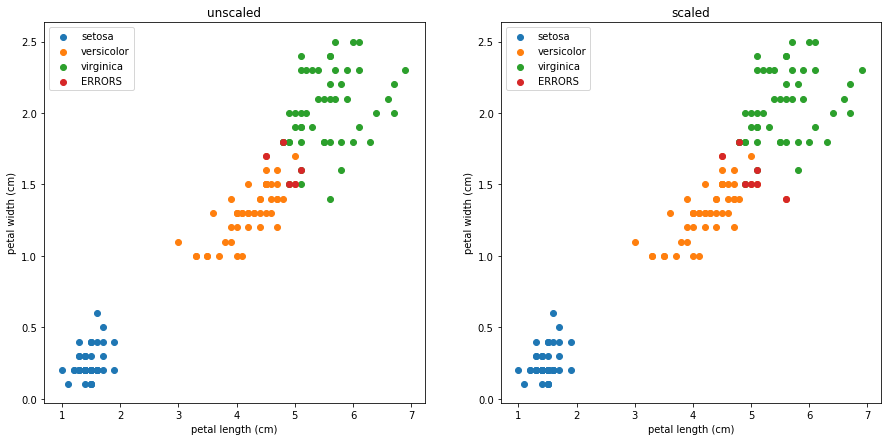

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Estimating its best parameters :
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(iris.data, iris.target)
y_est = clf.predict(iris.data)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(iris.data, iris.target)
y_est_scaled = std_clf.predict(iris.data)

## Getting some figures from this classifier :
print("Number of samples : ",len(iris.target))
print("Classification score:", clf.score(iris.data, iris.target))
print("Classification (scaled) score:", std_clf.score(iris.data, iris.target))

## Displaying over petal length and width :
ind1=2
ind2=ind1+1

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for ax, y_, title in zip(axs,
                        (y_est, y_est_scaled),
                        ('unscaled', 'scaled')):
    
    for c in np.unique(y_est) :
        ax.scatter(X[y_==c, ind1], X[y_==c, ind2], label=iris.target_names[c], alpha=1)
    ax.scatter(X[y_!=y, ind1], X[y_!=y, ind2], label="ERRORS", alpha=1)
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[ind1])
    ax.set_ylabel(iris.feature_names[ind2])
    ax.legend()


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken carefully, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

Changing the seed, performaces change 



Copyright GaÃ«l Varoquaux, Andreas MÃ¼ller, Modifications by Jaques Grobler, Serge Cohen, Bertrand Monfort, FrÃ©dÃ©ric-Emmanuel Picca

In [45]:
%matplotlib inline

/home/archives/prog/anaonda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


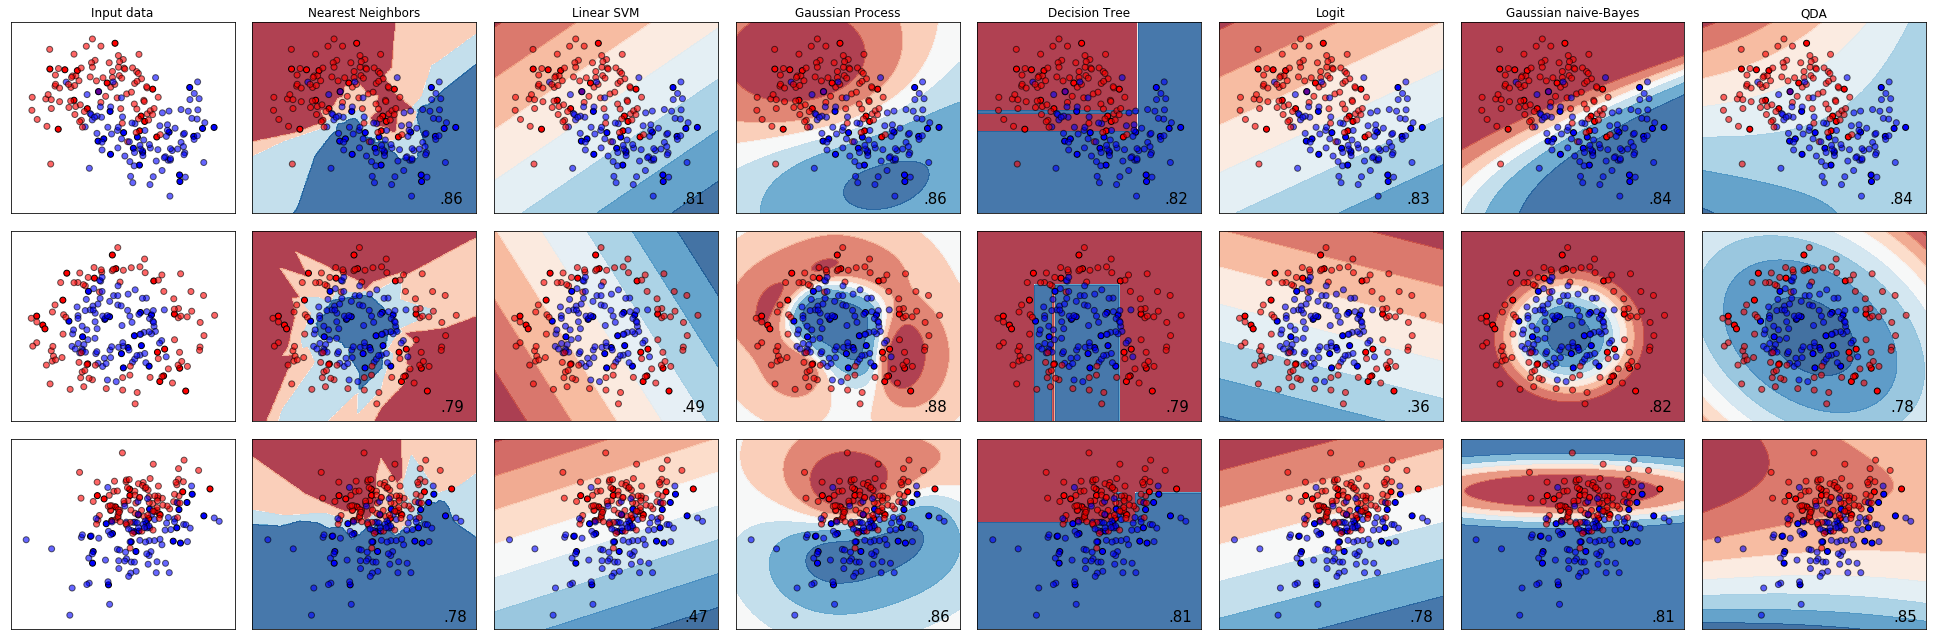

In [62]:
# The plots show training points in solid colors and testing points
# semi-transparent. The lower right shows the classification accuracy on the test set.
# 
# Adapated from 
# Code source: GaÃ«l Varoquaux
#              Andreas MÃ¼ller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

names = ["Nearest Neighbors",
         "Linear SVM",
         "Gaussian Process",
         "Decision Tree", 
         "Logit",
         "Gaussian naive-Bayes",
         "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(solver="lbfgs"),
    make_pipeline(StandardScaler(copy=True, with_mean=True, with_std=True), GaussianNB()),
    QuadraticDiscriminantAnalysis()]

#### CHANGE THE SEED ####
rand_seed = 0 # try 0 and 3
 
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=rand_seed+1, n_clusters_per_class=1, n_samples=200)
rng = np.random.RandomState(rand_seed+ 2) #2
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3,random_state=rand_seed, n_samples=200),  #,random_state=0 
            make_circles(noise=0.2, factor=0.5,random_state=rand_seed+1, n_samples=200),#,random_state=1
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=200-30, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

## Conclusions
* Even in two dimensions algorithms behaviors differ with noise
* In classifcation also there is a risk of overfitting
* This test is useful but it is much more diffcult to do inhigher dimension

### Copyrights
#### Last Section BSD-3-Clause

Copyright(C) Gaël Varoquaux, Andreas Müller, 
Modifications by Jaques Grobler, Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

####  Section Importance of the scaling BSD-3-Clause
Copyright (C) Tyler Lanigan Sebastian Raschka

#### Rest of the notebook
Copyright (C)  2017-2020  Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca under GDFL <a class="anchor" id="GFDL"></a>

Permission is granted to copy, distribute and/or modify this document under the terms of the GNU Free Documentation License, Version 1.3 or any later version published by the Free Software Foundation;   
with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.

A copy of the license is included in the section entitled "[GNU Free Documentation License](https://www.gnu.org/licenses/fdl-1.3-standalone.html)".